In [46]:
from load_data import *
from solver import *
from synthetic_graphs import plot_graph, signal_smoothness_on_graph, create_graph_from_laplacian
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data, test functions and create graph

In [99]:
# Load data and desired columns
fuel_data = Fuel_data('../__data/Donnees-annuelles-de-consommation-de-produits-petroliers-par-departement-France-metropol.2022-09.csv')
print("num fuel", fuel_data.num_fuel)
print("num dpt", fuel_data.num_dpt)
print("num years", fuel_data.num_years)


num fuel 12
num dpt 94
num years 17


In [108]:
#Test sample one year
samples_2005, fuels = fuel_data.samples_one_year(2005)
print('samples', type(samples_2005))
print(samples_2005.shape)
print(fuels)
# check normalization
print('means (close to 0) :', [np.sum(samples_2005[:, i]) / samples_2005.shape[0] for i in range(samples_2005.shape[1])])
print('std (close to 1) :', [np.sum(samples_2005[:, i] ** 2) / samples_2005.shape[0] for i in range(samples_2005.shape[1])])

samples <class 'numpy.ndarray'>
(94, 12)
['SUPER_PLOMBE', 'SUPER_SANS_PLOMB', 'GAZOLE', 'FOD', 'FOL', 'GNR', 'GPL', 'CARBUREACTEUR', 'SUPER_SANS_PLOMB_95', 'SUPER_SANS_PLOMB_95_E10', 'SUPER_SANS_PLOMB_98', 'SUPER_ETH_E85']
means (close to 0) : [-3.307047307394083e-17, 9.330597760147593e-17, -5.5215879150240496e-17, -4.015700301835673e-17, -8.740053598112935e-17, nan, nan, nan, nan, nan, nan, nan]
std (close to 1) : [0.9893617021276598, 0.9893617021276597, 0.9893617021276596, 0.9893617021276593, 0.9893617021276592, nan, nan, nan, nan, nan, nan, nan]


In [109]:
# Test sample by year
samples_super_plombe, years = fuel_data.samples_by_year(SUPER_SANS_PLOMB)
print('samples', type(samples_super_plombe))
print(samples_super_plombe.shape)
print(years)


samples <class 'numpy.ndarray'>
(94, 17)
[2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


<class 'list'>


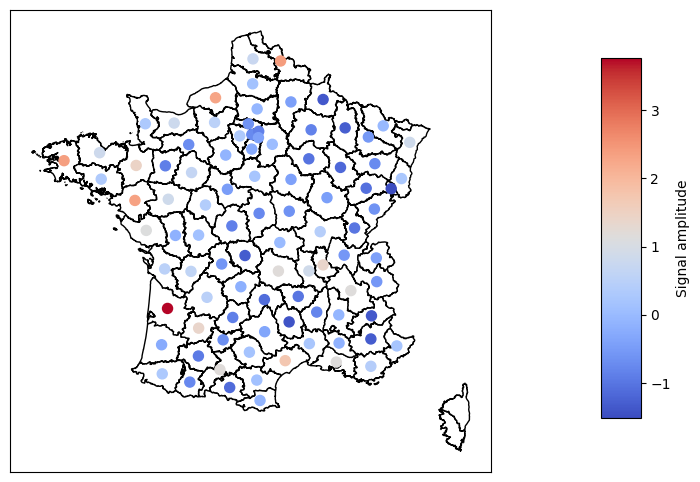

In [110]:
# Test graph contruction
fuel_data.generate_graph()
print(type(fuel_data.graph.nodes[1]['pos']))
plot_graph_department(fuel_data.graph, samples_2005[:, 0])

## Estimate graph

num var 12
num dpt 12
num years 17


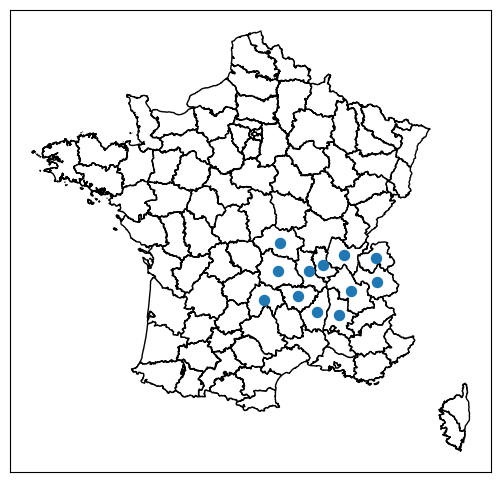

In [113]:
#Load data
region_ARA = [1, 3, 7, 15, 26, 38, 42, 43, 63, 69, 73, 74] #dpt region Auvergne Rhones Alpes
fuel_data_ARA = Fuel_data('../__data/Donnees-annuelles-de-consommation-de-produits-petroliers-par-departement-France-metropol.2022-09.csv')
fuel_data_ARA.truncate(dpt_to_keep=region_ARA)
print("num var", fuel_data_ARA.num_fuel)
print("num dpt", fuel_data_ARA.num_dpt)
print("num years", fuel_data_ARA.num_years)
fuel_data_ARA.generate_graph()
plot_graph_department(fuel_data_ARA.graph)

In [55]:
# Solver
# Solver parameters
max_iter = 1000
alpha = 1e-3
beta = 2e-3
solvers.options['show_progress'] = False
np.random.seed(3)
# Solving
L_est, Y_est = gl_sig_model(samples_ARA_200X.T, max_iter, alpha, beta)

(12, 12)
12.000000000000002
[(1, 74), (69, 43)]
[(1, 74, None)]
[1.293582152825178e-08, 5.999999986213323]


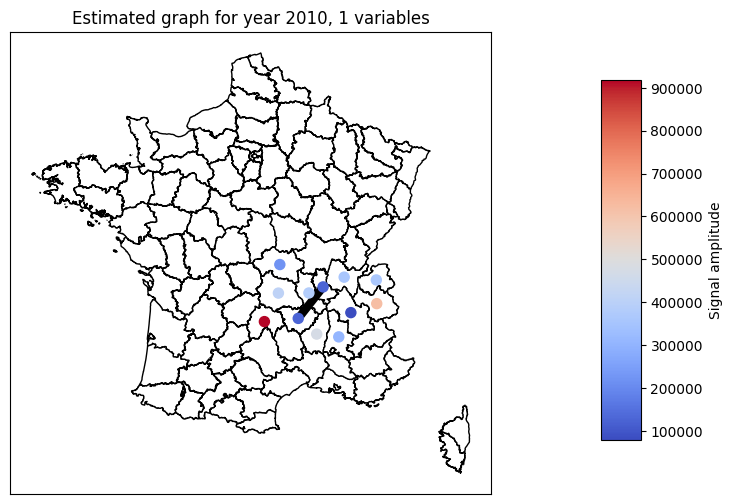

[1.31560958e-08 4.81999231e-11 5.99999999e+00 8.13589492e-11
 4.81752628e-11 1.15806210e-11 5.04872561e-10 5.99999999e+00
 1.32722560e-08 2.37493032e-12 1.18903252e-10 2.21672834e-10]


In [56]:
print(L_est.shape)
print(np.sum(np.diag(L_est)))
g_ARA_est = create_graph_from_laplacian(L_est, list(fuel_data_ARA.graph.nodes))
for node in g_ARA_est.nodes :
    g_ARA_est.nodes[node]['pos'] = fuel_data_ARA.graph.nodes[node]['pos']
print([(u, v) for u, v in g_ARA_est.edges])
print(g_ARA_est.edges(1, 42))
print([g_ARA_est.edges[u, v]['weight'] for u, v in g_ARA_est.edges()])
plot_graph_department(g_ARA_est, samples_ARA_200X[:, 0], title=f"Estimated graph for year {year}, {samples_ARA_200X.shape[1]} variable(s)")
print(np.diag(L_est))